$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 6} $$

$$ \text{Above Nyquist Rate Sampling: Aliasing}
 $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ Aug\ 2016 $$

# Questions:

- What can be the highest frequency of a signal if it is sampled at $f_s$?


- What is the period of a discrete time sinusoidal signal that is sampled at Nyquist criterion?


- What happens if it is higher than $f_s /2$?


# Example: Grid Notebook and Sampling

- Imagine that we have a grid notebook. Starting from the top, we draw row-vise periodic pulses 
    
    -The first row has 4 white, 4 black in one cycle, thus, its period is 8 grids. For 24 grids, we have 3 full cycles.
    
    -The second row has 3 white, 3 black in one cycle and its period is 6 grids. For 24 grids, we have 4 full cycles.
    
    -Similarly, the third row has 2 white, 2 black in one cycle and its period is 4 grids. For 24 grids, we have 6 full cycles.
    
    -Finally, the fourth row has 1 white and 1 blac in one cycle and its period is 2 grids. For 24 grids, we have 12 full cycles.


- The final row has the smallest period (*2 grids*) and largest number of cycles (frequency) for 24 grids.

Populating the interactive namespace from numpy and matplotlib


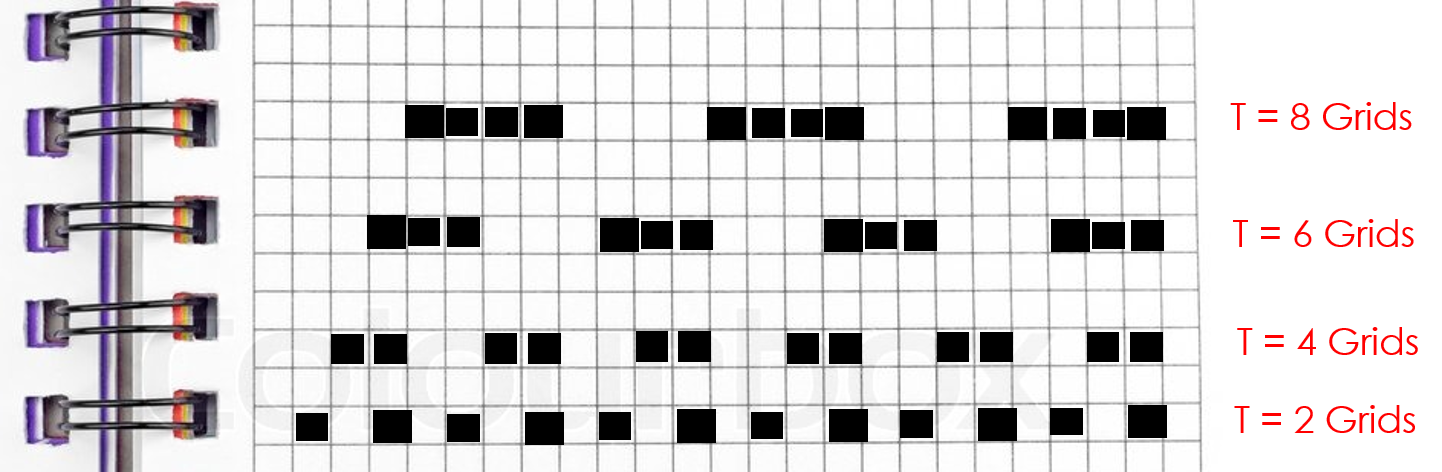

In [4]:
% pylab inline
from numpy.fft import *
from IPython.display import Image
Image('./Figs/EE0404_Lec6_F1.png')

- So, the smallest period is 2 x Grid Size.


- Similarly, if a discrete time system has a sampling period (grid size) of $T_s$, the smallest period will be $ 2 T_s $.


- That is:

$$ T \ge 2T_s $$

or in terms of frequency

$$ \frac {1}{f} \ge \frac{2}{f_s} $$

$$ f \le \frac{f_s}{2} $$


- This states that if a discrete time system has a sampling frequency of $f_s$, the highest frequency should not exceed half of $f_s$


- This limit is called the Nyquist rate.


# Example 1:

$$ x(n) = cos(0.9\pi n) $$

- What is the normalized frequency ($f_N$)?

- What is the real frequency if $f_s$ = 100 Hz.

- What is the minimum number of FFT points required to detect the peaks of cosine?

## Solution

- The generalized form is

$$ x(n) = cos( \Omega\ n) = cos (2\pi f_N n) = cos (2\pi \frac{f_r}{f_s} n) $$

Thus, ** normalized frequency** is

$$ 0.9 \pi = 2\pi f_N \to f_N = 0.45 $$

- **The real frequency:**

$$ f_r = f_s . f_N = 0.45 \ 100 = 45\ Hz$$

- For the basis functions to catch this frequency,

$$ 2\pi \frac {k}{M} = 0.9\pi \to \frac{k}{M} = \frac{9}{20} $$

Thus, the minimum number of FFT points is M=20.

In [3]:
%pylab inline

M = 20.0
n = arange(M)
fs = 100.0
x = cos(.9*pi*n)
k = arange(M)

stem(k, abs(fft(x))/M)
xlim([-0.5, 20.5])
ylim([-.1, 0.55])
xlabel('k',fontsize=17)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


TypeError: 'module' object is not callable

# Example 2:

$$ x(n) = cos(0.95\pi n) $$

- What is the normalized frequency ($f_N$)?

- What is the real frequency if $f_s$ = 100 Hz.

- What is the minimum number of FFT points required to detect the peaks of cosine?

## Solution

- ** Normalized frequency** is

$$ 0.95 \pi = 2\pi f_N \to f_N = 0.475 $$

- **The real frequency** is

$$ f_r = f_s . f_N = 0.475 \ 100 = 47.5\ Hz$$

- For the basis functions to catch this frequency,

$$ 2\pi \frac {k}{M} = 0.95\pi \to \frac{k}{M} = \frac{19}{40} $$

Thus, for this state the minimum number of FFT points is M=40.

In [ ]:
M = 40.0
n = arange(M)
fs = 100.0
x = cos(.95*pi*n)
k = arange(M)

stem(k, abs(fft(x))/M)
xlim([-1, 40])
ylim([-.1, 0.55])
xlabel('k',fontsize=17)

# Example 3:

$$ x(n) = cos(\pi n) $$

- What is the normalized frequency ($f_N$)?

- What is the real frequency if $f_s$ = 100 Hz.

- What is the non-zero FFT bin if M=40?

## Solution

- ** Normalized frequency** is

$$ \pi = 2\pi f_N \to f_N = 0.5 $$

- **The real frequency** is

$$ f_r = f_s . f_N = 0.5 \ 100 = 50\ Hz$$

- the non-zero FFT bin for M=40 is

$$ 2\pi \frac {k}{40} = \pi \to k = 20$$



In [ ]:
M = 40.0
n = arange(M)
fs = 100.0
x = cos(pi*n)
k = arange(M)

stem(k, abs(fft(x))/M)
xlim([-1, 40])
ylim([-.1, 1.2])
xlabel('k',fontsize=17)

# Inspection of Aliasing Effect via Spectogram and Auditory

## Generation of test linear chirp

- A linear chirp signal is desired to have the instantaneous frequency shape below.



In [ ]:
K = 2000
b = 2000
t = linspace(0,4,20)
f = K*t +b
plot(t,f)
xlabel('Time-(sec)')
ylabel('Frequency (Hz)')
title('Desired Inst. Freqeuency',fontsize=17)
ylim([0, 12000])
grid(True)

- The inst. frequency equation is
$$ f(t) = 2000t + 2000 $$

- thus the required phase function is

$$ \phi (t) = 2000 \pi t^2 + 4000 \pi t $$

- Since maximum frequency is 10 kHz, we must pick $f_s \ge 20\ kHz $ for proper generation of the linear chirp. 

- Many soundcards support standard rates such as 8000, 11025, 22050, 44100 and 48000 Hz. So we may pick 44100 and generate 4 seconds of data.



In [ ]:
# Generation of (aliased) linear chirp



fs = 8000.0
t = linspace(0,4,4*fs)
x = sin(2000*pi*t*t+4000*pi*t)

from IPython.display import Audio

Audio(data=x,rate=fs)

In [ ]:
from matplotlib.mlab import *

out =specgram(x, NFFT=800, Fs=8000.0, noverlap=400, mode='default');
pcolor(out[2],out[1],out[0]);xlabel('Time (sec)');ylabel('Frequency');